In [1]:
#Imports
import numpy as np
import pandas as pd
import datetime as dt
#MICE Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
#Data Scaling and Encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#PCA
from sklearn.decomposition import PCA
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools
#Clustering algorithms and metrices
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import GridSearchCV
import sklearn.cluster as cluster
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
#Ignore the warning due to the sklearn version problem
import warnings
warnings.filterwarnings('ignore', message='The default value of `n_init` will change from 10 to \'auto\' in 1.4.')

In [2]:
#Set the working directory to where the data file is located
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df_copy = df.copy()

In [3]:
# Set the parameter in pandas
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns',29)

In [4]:
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   
5  09-09-2013       16       520         42               98                0   
6  13-11-2012       34       235         65              164               50   
7  08-05-2013       32        76         10               56                3   
8  06-06-2013       19        14          0               24                3   
9  13-03-2014       68        28          0                6                1   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   
5                42            14                  2                6   
6                49            27                  4                7   
7                 1            23                  2                4   
8                 3             2                  1                3   
9                 1            13                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   
5                    4                 10                  6             0   
6                    3                  7                  6             0   
7                    0                  4                  8             0   
8                    0                  2                  9             0   
9                    0                  0                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0        

In [5]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [6]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [7]:
#showing the variables with zero variance 
print(df.var()==0)

ID                     False
Year_Birth             False
Income                 False
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact           True
Z_Revenue               True
Response               False
dtype: bool


In [8]:
#calculate total number of isnull variables
#a total of 24 customers do not have their yearly income recorded on the data
#show a bar chart to show clearly the missing values
missing_v = df.isna().sum().to_dict()
missing_v_df = pd.DataFrame(list(missing_v.items()),columns=['Column', 'missing_v'])

# Create subplots
fig = make_subplots(rows=1, cols=1,
                    subplot_titles=("Missing Values",))

# Add trace for missing values
fig.add_trace(go.Bar(x=missing_v_df['Column'], y=missing_v_df['missing_v'], 
                     marker_color='indianred'), row=1, col=1)

# Update layout
fig.update_layout(title_text='<b>Missing Values</b>', 
                  paper_bgcolor='rgb(229, 236, 246)', 
                  font=dict(size=18), showlegend=False)

fig.show()

There are total of 2240 rows (entries) which is from 0 to 2239 and 24 (columns) as shown in the output above are missing values in Income feature. Each row corresponds to a customer.

Based on the `var()` and `isnull().sum()` function, there are a few interesting things to take note:
* There are `NA'S` (Missing Values) in the `Income` feature.
* Most of the numerical features portrayed positive skewness.
* Feature like `ID` is probably not useful as it does not encode any information about a customer. I will keep it in the `DataFrame` but not gonna use it for any subsequent analysis.
* Feature like `Z_CostContact` and  `Z_Revenue` are not useful attributes as they have zero variance in `var()`.
* Some feature enginnering is required for feature like `Dt_Customer` and as they are not stored in the correct data types. this will be performed in the subsection below. `Year_Birth` can be transformed into more intuitive attribute like **age** of customer.
* Feature restructuring from `character`to `factor` for features such as `Education` and `Marital Status`. 

## Feature Engineering

### Removal of zero variance variables

### Drop the zero variance feature like Z_CostContact and Z_Revenue

In [9]:
num_col_names = df.select_dtypes([np.number]).columns.values
drop_col = num_col_names[df.var()==0]

In [10]:
#Discard columns with zero variance
df.drop(drop_col, axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
#Tabulate the frequency of each marital status category
mar = pd.DataFrame(df['Marital_Status'].value_counts()).reset_index()
# pd.crosstab(index=cust_data["Marital_Status", "Count"]
mar.columns = ['Marital_Status', 'Count']
mar

Marital_Status  Count
0        Married    864
1       Together    580
2         Single    480
3       Divorced    232
4          Widow     77
5          Alone      3
6         Absurd      2
7           YOLO      2

### Feature extraction I
1. Derive the minimum numbers of household members from attributes `Marital_Status`, `Kidhome`, `Teenhome`.
2. Compute the total number of accepted offers by summing up the `Response` and five of the `AcceptedCmp` features.


In [13]:
#Show the minimum number of hosehold
df.pivot_table(index='Marital_Status', values=['Kidhome', 'Teenhome'], aggfunc='min').reset_index()

Marital_Status  Kidhome  Teenhome
0         Absurd        0         0
1          Alone        1         0
2       Divorced        0         0
3        Married        0         0
4         Single        0         0
5       Together        0         0
6          Widow        0         0
7           YOLO        0         1

In [14]:
#Calculate the total number of household member(Marital_Status, Teenhome, Kidhome)
df['Min_Household'] = df.groupby(['Marital_Status'])[['Kidhome', 'Teenhome']].min().sum(axis=1).min()

### Restructuring of Datatypes

In [15]:
print("Columns with string datatype are:")
for col in df.columns:
    if df[col].dtypes == object:
        print(col)

Columns with string datatype are:
Education
Marital_Status
Dt_Customer


In [16]:
# change date format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

#Gather all the AcceptedCmps and response in one features
df['Total_AcceptedCampaign'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

# convert categorical features to factor
categorical_features = ["Education", "Marital_Status", "AcceptedCmp1",
                         "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
                         "AcceptedCmp5", "Complain", "Response"]
for feature in categorical_features:
    df[feature] = df[feature].astype('string')

In [17]:
# Calculate age
df['Age'] = dt.datetime.now().year - df['Year_Birth']

In [18]:
# Calculate last enrollment date
last_enrollment = df['Dt_Customer'].max()

# Calculate days enrolled
df['Days_Enrolled'] = (last_enrollment - df['Dt_Customer']).dt.days

In [19]:
df_Edu = pd.DataFrame(df['Education'].value_counts()).reset_index()
df_Edu.columns = ['Education', 'Count']

In [20]:
df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])
df['Education'] = df['Education'].replace('2n Cycle', 'Master')

In [21]:
#Pie chart definition
colormap = ['#276359', '#BEBBA7', '#B9CDCB', '#F2DDCC', '#FCAC89', '#E38150']

def pie_chart(df, col, title):
    colormap = px.colors.qualitative.Pastel
    fig = px.pie(df, names=col, color_discrete_sequence=colormap)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(
        plot_bgcolor="rgb(229, 236, 246)", 
        paper_bgcolor="rgb(229, 236, 246)", 
        title_text=title,
        width=700, 
        height=600,
        font=dict(family="Helvetica, sans-serif", size=18, color="#7f7f7f")
    )
    return fig

In [22]:
pie_chart(df, 'Education', 'Customers By Education')

In [23]:
#Finds the counts of Married status
pie_chart(df, 'Marital_Status', 'Customers By Marital Status')

In [24]:
#Discretize the marital status to 2 distinct categories: 1. Relationship and 2. Single  
#Single include single, widow, alone, absurd, and yolo
mar_stat = ['Single', 'Widow', 'Alone', 'Absurd', 'YOLO']
df['Marital_Status'] = np.where(df['Marital_Status'].isin(mar_stat), 'Single', df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status'].isin(['Married', 'Together']), 'Relationship', 'Single')
df_Mar = pd.DataFrame(df['Marital_Status'].value_counts()).reset_index()
df_Mar.columns = ['Marital_Status', 'Count']
df_Mar

Marital_Status  Count
0   Relationship   1444
1         Single    796

In [25]:
# Create a dataframe for Marital_Status variable
df_Marital_Status = pd.DataFrame(df['Marital_Status'].value_counts()).reset_index()
df_Marital_Status.columns = ['Marital_Status', 'Count']

# Create subplots
fig = make_subplots(rows=1, cols=1,
                    subplot_titles=("Marital Status",))

# Add trace for Marital_Status variable
fig.add_trace(go.Bar(x=df_Marital_Status['Marital_Status'], y=df_Marital_Status['Count'], 
                     marker_color='indianred'), row=1, col=1)

# Update layout
fig.update_layout(title_text='<b>Marital Status</b>', 
                  paper_bgcolor='rgb(229, 236, 246)', 
                  font=dict(size=18), showlegend=False, 
                  xaxis_title='Marital Status', yaxis_title='Count')

fig.show()


In [26]:
# total spendings
df['Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['Familysize'] = df['Marital_Status'].replace({"Married":"Relationship", "Together":"Relationship",
                                                 "Widow":"Single", "Divorced":"Single", 
                                                 "Single":"Single","Alone":"Single", "Absurd":"Single", "YOLO":"Single"}).replace({'Single': 1, 'Relationship' : 2}).fillna(0).astype(int) + df['Kidhome'] + df['Teenhome']

#Total purchases
df['Total_Purchases'] = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

# remove features not used
df = df.drop([ 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Kidhome', 'Teenhome'], axis=1)


In [27]:
df_ = df.copy()

In [28]:
df.drop(columns=['Dt_Customer','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'], inplace=True)

In [29]:
df.head()

ID   Education Marital_Status   Income  Recency  NumWebVisitsMonth  \
0  5524  Graduation         Single  58138.0       58                  7   
1  2174  Graduation         Single  46344.0       38                  5   
2  4141  Graduation   Relationship  71613.0       26                  4   
3  6182  Graduation   Relationship  26646.0       26                  6   
4  5324         PhD   Relationship  58293.0       94                  5   

   Min_Household  Total_AcceptedCampaign  Age  Days_Enrolled  Spend  \
0              0                       1   66            663   1617   
1              0                       0   69            113     27   
2              0                       0   58            312    776   
3              0                       0   39            139     53   
4              0                       0   42            161    422   

   Familysize  Total_Purchases  
0           1               25  
1           3                6  
2           2               21  
3           3                8  
4           3               19

In [30]:
#remove minimum household for correlation purpose
df_corr = df.drop(['Min_Household'], axis=1)

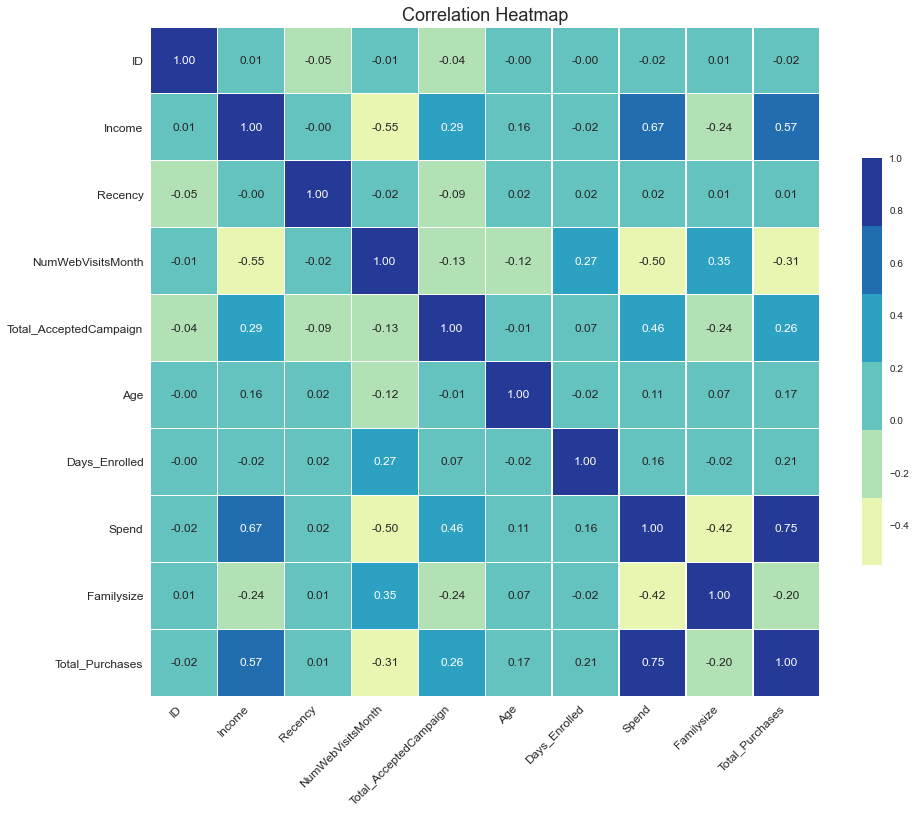

In [31]:
# Set the figure size
fig, ax = plt.subplots(figsize=(15, 15))

# Define the colormap
cmap = sns.color_palette("YlGnBu")

# Generate the heatmap
heatmap = sns.heatmap(df_corr.corr(), cmap=cmap, annot=True, fmt=".2f", square=True,
                      annot_kws={"size": 12}, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Customize the x and y axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)

# Customize the title
ax.set_title("Correlation Heatmap", fontsize=18)

# Show the plot
plt.show()

### Insight:
Based on the heatmap above, the strong positive linear correlation (0.75) of Spent and Total_Purchases may suggest that large amount of spending made through catalogue are on meat product, compated to other products since the features are highly positively correlated, which means that they tend to increase or decrease together.

In [32]:
#Show the minimum and maximum recency
print(f"Customer with most recent non transaction streak is {df['Recency'].min()} days while customer with longest non transaction streak is {df['Recency'].max()} days")

Customer with most recent non transaction streak is 0 days while customer with longest non transaction streak is 99 days


In [33]:
#shows the minimum and maximum number of age
print("The youngest customer is {} years old and the oldest customer is {} years old".format(df['Age'].min(), df['Age'].max()))

The youngest customer is 27 years old and the oldest customer is 130 years old


## Get rid of Outliers

In [34]:
# Create a figure with customized layout and style
fig = make_subplots(rows=2, cols=3, subplot_titles=("Income", "Age", "Deals Purchases",
                                                     "Total Spend", "Coupons Accepted", 
                                                     "Total Purchases"))

# Define the box plot traces
box_traces = [go.Box(y=df_['Income'], name='Income', boxpoints='outliers', marker=dict(size=2)),
              go.Box(y=df_['Age'], name='Age', boxpoints='outliers', marker=dict(size=2)),
              go.Box(y=df_['NumDealsPurchases'], name='Deals Purchases', boxpoints='outliers', marker=dict(size=2)),
              go.Box(y=df_['Spend'], name='Total Spend', boxpoints='outliers', marker=dict(size=2)),
              go.Box(y=df_['Total_AcceptedCampaign'], name='Coupons Accepted', boxpoints='outliers', marker=dict(size=2)),
              go.Box(y=df_['Total_Purchases'], name='Total Purchases', boxpoints='outliers', marker=dict(size=2))]

# Add the box plot traces to the figure
for i, trace in enumerate(box_traces):
    fig.add_trace(trace, row=(i//3)+1, col=(i%3)+1)

# Customize the layout of the figure
fig.update_layout(title_text="Box Plot to check for outliers",
                  paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22,
                  title_x=0.5,
                  margin=dict(l=30, r=30, t=80, b=10),
                  height=600,
                  font=dict(family="Open Sans", size=14),
                  showlegend=False,
                  yaxis=dict(titlefont=dict(size=12)),
                  xaxis=dict(titlefont=dict(size=12)),
                  yaxis2=dict(titlefont=dict(size=12)),
                  xaxis2=dict(titlefont=dict(size=12)),
                  yaxis3=dict(titlefont=dict(size=12)),
                  xaxis3=dict(titlefont=dict(size=12)),
                  yaxis4=dict(titlefont=dict(size=12)),
                  xaxis4=dict(titlefont=dict(size=12)),
                  yaxis5=dict(titlefont=dict(size=12)),
                  xaxis5=dict(titlefont=dict(size=12)),
                  yaxis6=dict(titlefont=dict(size=12)),
                  xaxis6=dict(titlefont=dict(size=12)),
                  hoverlabel=dict(font=dict(size=12)),
                  hovermode="closest")

# Show the figure
fig.show()

In [35]:
fig = make_subplots(rows=1, cols=2,
                          subplot_titles=('Age', 'Income'))

trace_age = go.Box(
        y=df_['Age'],name="Detect Outliers",boxpoints='outliers',
        marker=dict(
            color='rgb(8,81,156)',outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',outlierwidth=2)),
        line_color='rgb(8,81,156)')

trace_income = go.Box(
        y=df_['Income'],name="Detect Outliers",boxpoints='outliers',
        marker=dict(
            color='rgb(8,81,156)',outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',outlierwidth=2)),
        line_color='rgb(8,81,156)')

fig.append_trace(trace_age, 1, 1)
fig.append_trace(trace_income, 1, 2)
fig.update_layout(showlegend=False, title_text='Box Plots', height=700, width=1000, font_size=17)
fig.show()

### Insight:
1. At the `Income` feature, there are some customers earns more than 150000 and few even more than 600000.
2. At the `Age` feature, there were two shaded dots appears above 100 and it was imposible if assume a human total living years is 100 years old 
3. Others features was reasonable
3. Thus, lets drop those data with imposible features 

In [36]:
#filter out age >= 100
df = df[(df['Age']<100)]

#Unusually high Income
#Assume a customer's Income not more than 600000 since the outlier show untill 600000
df = df[(df['Income']<600000)]

df_clean = df.copy()

#show the total length of data after dropping
print('The total number of data after removing the outliers are:', len(df))

The total number of data after removing the outliers are: 2212


In [37]:
df.head()

ID   Education Marital_Status   Income  Recency  NumWebVisitsMonth  \
0  5524  Graduation         Single  58138.0       58                  7   
1  2174  Graduation         Single  46344.0       38                  5   
2  4141  Graduation   Relationship  71613.0       26                  4   
3  6182  Graduation   Relationship  26646.0       26                  6   
4  5324         PhD   Relationship  58293.0       94                  5   

   Min_Household  Total_AcceptedCampaign  Age  Days_Enrolled  Spend  \
0              0                       1   66            663   1617   
1              0                       0   69            113     27   
2              0                       0   58            312    776   
3              0                       0   39            139     53   
4              0                       0   42            161    422   

   Familysize  Total_Purchases  
0           1               25  
1           3                6  
2           2               21  
3           3                8  
4           3               19

In [38]:
df_ = df.copy()
df_.reset_index(inplace=True)

## Feature II
## Missing Value Imputation
There are primarily two ways to deal with missing values:

1. Complete case analysis (drop observation(s) with missing values).
2. Imputation.
* Single imputation.
* Multiple imputation.

## MICE Imputation
***The IterativeImputer (MICE) performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value.***

### Why use MICE?
***One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g. impute.SimpleImputer). By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values (e.g. impute.IterativeImputer).***

In [39]:
#Mice Imputer
df_mice = df.copy(deep=True)
mice_imputer = IterativeImputer()
df['Income'] = mice_imputer.fit_transform(df[['Income']])

In [40]:
#Check the present of missing values
present = 0
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"Column '{col}' has {df[col].isnull().sum()} missing values")
        present = 1
if not present:
        print("No missing values are present in the dataset")

No missing values are present in the dataset


## Data Scaling and Encoding

In [41]:
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
print(int_list)

['Income']


In [42]:
autoscaler = StandardScaler()
df[int_list] = autoscaler.fit_transform(df[int_list])

In [43]:
df = df.set_index('ID')
df.reset_index(inplace=True)

In [44]:
df.reset_index(inplace=True)

In [45]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status']

In [46]:
#Data encoding
label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])

## Dimension Reduction

In [47]:
# dimension reduction
pca = PCA(n_components=3)
pca.fit(df)
PCA_data_cluster = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_data_cluster.describe().T

count          mean          std          min          25%         50%  \
col1  2212.0  1.519251e-13  3247.538215 -5585.669706 -2768.530215 -129.373925   
col2  2212.0 -4.054077e-13   638.693762 -1118.171081  -551.865520   -6.419557   
col3  2212.0  5.643225e-14   603.430574  -630.564661  -535.782187 -211.000310   

              75%          max  
col1  2834.738758  5608.083981  
col2   553.540336  1120.519487  
col3   447.566980  1900.309090

In [69]:
# Get the data
x = PCA_data_cluster["col1"]
y = PCA_data_cluster["col2"]
z = PCA_data_cluster["col3"]

# Create a dataframe for the data
data = pd.DataFrame({'x': x, 'y': y, 'z': z})

# Create a trace for the 3D scatter plot
trace = go.Scatter3d(
    x=data['x'],
    y=data['y'],
    z=data['z'],
    mode='markers+lines',
    marker=dict(
        size=7,
        color='#276359',
        opacity=0.8,
        line=dict(
            width=1,
            color='white'
        )
    ),
    text=['Data point {}'.format(i) for i in range(len(data))]
)

# Create the layout for the 3D plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=50),
    title='<b>PCA 3D Dimension Reduction Result</b>',
    font=dict(
        family="Ubuntu Mono",
        size=14
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Ubuntu Mono"
    ),
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    legend=dict(
        title='Cluster'
    )
)

# Create the figure and add the trace and layout
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


## Clustering Algorithms

### 1. Selection of optimal number of clusters, k

### Measurement Used
The **Davies-Bouldin index** is a measure of cluster quality that takes into account both the within-cluster dispersion and the between-cluster separation. It compares the average pairwise distance between clusters to the average distance between points within clusters.

A lower Davies-Bouldin index indicates better clustering, meaning that the clusters are more separated from each other and more compact. Therefore, it is used to evaluate the performance of different clustering algorithms and the optimal number of clusters.

The purpose of the **Silhouette Score** is to help determine the optimal number of clusters for a given dataset by providing a quantitative measure of how well the data points are clustered. Higher silhouette scores indicate better-defined clusters, and can therefore help in identifying the optimal number of clusters.

### Method used
**AIC** is an estimator of the relative quality of statistical models for a given set of data. It is based on the maximum likelihood estimation (MLE) method and takes into account the number of parameters in the model. The lower the AIC value, the better the model.

**BIC**, on the other hand, is a variant of AIC that includes a stronger penalty for the number of parameters in the model. BIC is also based on MLE, but it is a more conservative measure than AIC. The goal of BIC is to identify the model that has the highest posterior probability of being the true model, given the data. The lower the BIC value, the better the model.

The purpose of AIC and BIC is to choose the best model among a set of candidate models, based on the trade-off between model complexity and goodness of fit. AIC and BIC both penalize models that are too complex, but they differ in the degree of penalty they apply.

In summary, AIC and BIC are used to compare the fit of different models to the same data and to select the best model based on the trade-off between model complexity and goodness of fit.

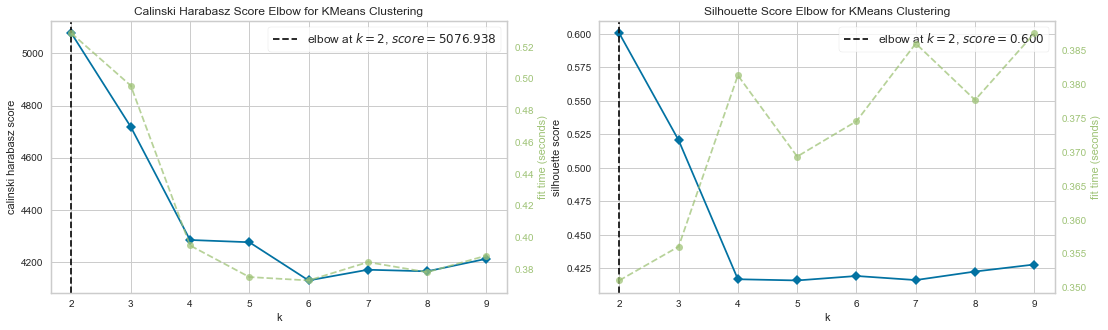

In [49]:
# Convert non-numeric columns to strings
df[df.select_dtypes(exclude=np.number).columns] = df.select_dtypes(exclude=np.number).astype(str)

#remove the unused features
df_norm = df.drop(['Min_Household','NumWebVisitsMonth','Recency','ID','index'], axis=1)

# Convert non-numeric columns to strings
df[df.select_dtypes(exclude=np.number).columns] = df.select_dtypes(exclude=np.number).astype(str)

# Select the features that you want to normalize
features = ['Income','Total_AcceptedCampaign', 'Age', 'Days_Enrolled', 'Spend', 'Familysize', 'Total_Purchases']

# Normalize the selected features using min-max normalization
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Create a KMeans model with k-means++ initialization
model = KMeans(init='k-means++', random_state=42)

# Calinski_harabasz Scoring Matrix
plt.figure(figsize=(18,5))

plt.subplot(121)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz')
visualizer.fit(df_norm)        # Fit the data to the visualizer
visualizer.finalize()

# Silhouette Scoring Matrix
plt.subplot(122)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(df_norm)        # Fit the data to the visualizer
visualizer.finalize()
plt.show()

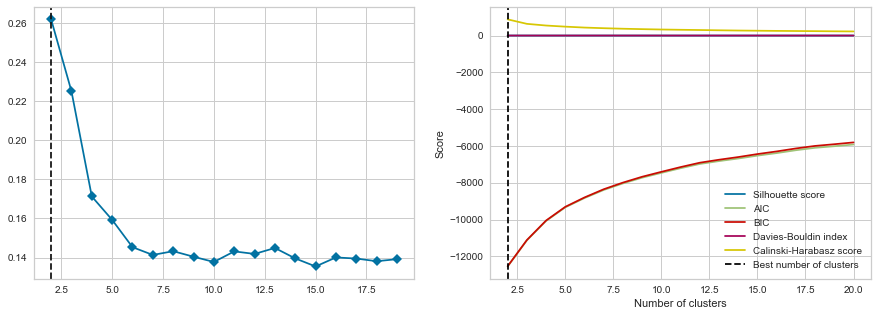

In [50]:
# Convert non-numeric columns to strings
df[df.select_dtypes(exclude=np.number).columns] = df.select_dtypes(exclude=np.number).astype(str)

#remove the unused features
df_norm = df.drop(['Min_Household','NumWebVisitsMonth','Recency','ID','index'], axis=1)

# Calculate the Silhouette score, AIC, BIC, Davies-Bouldin index, and Calinski-Harabasz score
silhouette_scores = []
aic_values = []
bic_values = []
db_index_scores = []
ch_scores = []
n_clusters = range(2, 21)

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='random', random_state=42).fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    silhouette_scores.append(score)
    
    aic = kmeans.score(df_norm) + 2 * n
    aic_values.append(aic)
    
    bic = kmeans.score(df_norm) + np.log(df_norm.shape[0]) * n
    bic_values.append(bic)
    
    db_index = davies_bouldin_score(df_norm, kmeans.labels_)
    db_index_scores.append(db_index)
    
    ch_score = calinski_harabasz_score(df_norm, kmeans.labels_)
    ch_scores.append(ch_score)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Find the elbow point using KElbowVisualizer
model = KMeans(init='k-means++', n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 20), metric='silhouette', timings=False, ax=ax[0])
visualizer.fit(df_norm)

best_n_clusters = visualizer.elbow_value_

# Plot the elbow curve, AIC and BIC
ax[1].plot(n_clusters, silhouette_scores, label='Silhouette score')
ax[1].plot(n_clusters, aic_values, label='AIC')
ax[1].plot(n_clusters, bic_values, label='BIC')
ax[1].plot(n_clusters, db_index_scores, label='Davies-Bouldin index')
ax[1].plot(n_clusters, ch_scores, label='Calinski-Harabasz score')
ax[1].axvline(best_n_clusters, linestyle='--', color='black', label='Best number of clusters')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Score')
ax[1].legend()
plt.show()

### K-means Algorithm

In [51]:
# Determine the optimal number of clusters using the elbow method or silhouette method
best_n_clusters = 2

# Fit KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42).fit(df_norm)

# Assign cluster labels to each data point
pred = kmeans.predict(df_norm)
df['Cluster'] = pred+1

In [52]:
df['Cluster'] = df['Cluster'].astype('object')
df_ = pd.merge(df_, df[['ID', 'Cluster']], how='left')
df_['Cluster'] = df_['Cluster'].astype('str')
df_['Cluster'] = np.where(df_['Cluster'] == '1', "Cluster 1", np.where(df_['Cluster'] == '2', "Cluster 2", np.where(df_['Cluster'] == '3', "Cluster 3", "Cluster 4")))

In [53]:
# Create empty lists for storing the scores
silhouette_scores = []
calinski_harabasz_scores = []
aic_values = []
bic_values = []
n_clusters = []
davies_bouldin_index = []

# Compute clustering scores for each value of k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_norm)
    labels = kmeans.labels_
    n_clusters.append(k)
    silhouette_scores.append(silhouette_score(df_norm, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(df_norm, labels))
    aic = kmeans.score(df_norm) + 2 * k
    bic = kmeans.score(df_norm) + np.log(df_norm.shape[0]) * k
    aic_values.append(aic)
    bic_values.append(bic)
    davies_bouldin_index.append(davies_bouldin_score(df_norm, labels))

# Find the best number of clusters based on the highest scores
best_n_clusters_silhouette = n_clusters[np.argmax(silhouette_scores)]
best_n_clusters_aic = n_clusters[np.argmin(aic_values)]
best_n_clusters_bic = n_clusters[np.argmin(bic_values)]
best_n_clusters_calinski_harabasz = n_clusters[np.argmax(calinski_harabasz_scores)]
best_n_clusters_db = n_clusters[np.argmin(davies_bouldin_index)]

# Create pivot table
pivot_table = pd.DataFrame({
    'Number of clusters': n_clusters,
    'Silhouette score': silhouette_scores,
    'Calinski-Harabasz score': calinski_harabasz_scores,
    'AIC': aic_values,
    'BIC': bic_values,
    'Davies-Bouldin Index': davies_bouldin_index,
})

# Add columns for best number of clusters
pivot_table['Best Silhouette'] = np.where(pivot_table['Number of clusters'] == best_n_clusters_silhouette, 'Yes', 'No')
pivot_table['Best Davies-Bouldin'] = np.where(pivot_table['Number of clusters'] == best_n_clusters_db, 'Yes', 'No')
pivot_table['Best AIC'] = np.where(pivot_table['Number of clusters'] == best_n_clusters_aic, 'Yes', 'No')
pivot_table['Best BIC'] = np.where(pivot_table['Number of clusters'] == best_n_clusters_bic, 'Yes', 'No')
pivot_table['Best Calinski-Harabasz'] = np.where(pivot_table['Number of clusters'] == best_n_clusters_calinski_harabasz, 'Yes', 'No')

# Rearrange and rename columns
pivot_table = pivot_table[['Number of clusters','Best Silhouette','Best Davies-Bouldin','Best AIC', 'Best BIC', 'Best Calinski-Harabasz', 'AIC', 'BIC', 'Calinski-Harabasz score', 'Silhouette score', 'Davies-Bouldin Index']]
pivot_table = pivot_table.rename(columns={'Number of clusters': 'Number of clusters'})

# Display pivot table
display(pivot_table.style.hide_index().set_caption('Clustering Metrics Summary').set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]).set_properties(**{'text-align': 'center'}))


### Insight:
The best number of clusters must fulfill the following metrices conditiosn :-
- A lowest AIC or BIC value indicates a better fit
- A higher the Calinski-Harabasz score, the better the performance
- A score of 1 denotes the best which mean the Silhoutte score whicn approaching to one is best cluster
- Davies-Bouldin Index which is bounded – 0 to 1, lowest score is better.

Thus, the best cluster was **2** as shown in above pivot table

In [70]:
# k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_preds = kmeans.fit_predict(df_norm)
plot_km = df_
plot_km['KMeans Cluster'] = kmeans_preds
plot_km=plot_km.sort_values(by='Cluster')
plot_km['KMeans Cluster'] = plot_km['Cluster'].astype(str).apply(lambda x: 'Outliers' if x == '-1' else x)

# # Reverse normalization
# plot_km['Income'] = plot_km['Income'] * 100
# plot_km['Spend'] = plot_km['Spend'] * 1000

# Plot of clusters
temp = go.layout.Template()
temp.layout.plot_bgcolor = '#F9F9F9'
temp.layout.paper_bgcolor = '#F9F9F9'
temp.layout.legend.font.color = '#4D4D4D'
temp.layout.font.color = '#4D4D4D'
fig = px.scatter(plot_km, x="Income", y="Spend", color="KMeans Cluster",
                 color_discrete_sequence=px.colors.qualitative.T10[2:])
fig.update_traces(marker=dict(size=11, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="KMeans Cluster Profiles,<br>Customer Spending vs. Income",
                  width=700, legend_title='Cluster',
                  paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22,
                  xaxis=dict(title='Spending', showline=True, zeroline=False, range=[0, None]),
                  yaxis=dict(title='Income, $', ticksuffix='k', showline=True, range=[0, None]))

fig.show()


# Dbscan

Optimal Epsilon: 0.1


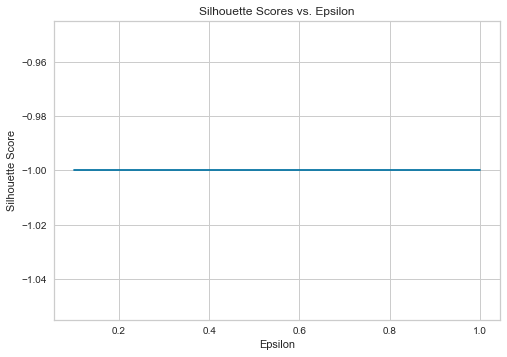

In [55]:
# Define range of epsilon values to test
param_grid = {'eps': [i/10 for i in range(1,11)]}

# Define DBSCAN model
db = DBSCAN(min_samples=18)

# Define silhouette scorer
def my_silhouette_score(estimator, X):
    labels = estimator.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        return silhouette_score(X, labels)
    else:
        return -1

# Define GridSearchCV model
grid = GridSearchCV(db, param_grid, cv=5, scoring=my_silhouette_score)

# Fit GridSearchCV model on data
grid.fit(df_norm)

# Print the optimal epsilon value
print('Optimal Epsilon:', grid.best_params_['eps'])

# Plot the silhouette scores vs. epsilon values
silhouette_scores = grid.cv_results_['mean_test_score']
eps_range = [i/10 for i in range(1,11)]
plt.plot(eps_range, silhouette_scores)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs. Epsilon')
plt.show()


In [56]:
eps_values = []
min_samples_values = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_index = []
aic_scores = []
bic_scores = []

# Compute clustering scores for each combination of eps and min_samples
for eps in np.arange(0.1, 0.5, 0.1):
    for min_samples in range(2, 6):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(df_norm)
        labels = dbscan.labels_
        if len(np.unique(labels)) > 1:
            eps_rounded = round(eps, 1)
            eps_values.append(eps_rounded)
            min_samples_values.append(min_samples)
            silhouette_scores.append(silhouette_score(df_norm, labels))
            calinski_harabasz_scores.append(calinski_harabasz_score(df_norm, labels))
            davies_bouldin_index.append(davies_bouldin_score(df_norm, labels))


best_eps_dbscan = eps_values[np.argmax(silhouette_scores)]
best_min_samples_dbscan = min_samples_values[np.argmin(davies_bouldin_index)]

# Create pivot table
pivot_table_dbscan = pd.DataFrame({
    'EPS': eps_values,
    'Min Samples': min_samples_values,
    'Silhouette score': silhouette_scores,
    'Calinski-Harabasz score': calinski_harabasz_scores,
    'Davies-Bouldin Index': davies_bouldin_index,
})

# Add columns for best hyperparameters
pivot_table_dbscan['Best Silhouette'] = np.where((pivot_table_dbscan['EPS'] == best_eps_dbscan) & (pivot_table_dbscan['Min Samples'] == best_min_samples_dbscan), 'Yes', 'No')
pivot_table_dbscan['Best Davies-Bouldin'] = np.where((pivot_table_dbscan['EPS'] == best_eps_dbscan) & (pivot_table_dbscan['Min Samples'] == best_min_samples_dbscan), 'Yes', 'No')

# Rearrange and rename columns
pivot_table_dbscan = pivot_table_dbscan[['EPS', 'Min Samples', 'Best Silhouette', 'Best Davies-Bouldin', 'Calinski-Harabasz score', 'Silhouette score', 'Davies-Bouldin Index']]
pivot_table_dbscan = pivot_table_dbscan.rename(columns={'Min Samples': 'Min Samples'})

# Display pivot table
display(pivot_table_dbscan.style.hide_index().set_caption('DBSCAN Clustering Metrics Summary').set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]).set_properties(**{'text-align': 'center'}))


In [57]:
# DB Scan clustering
db=DBSCAN(eps=0.3, min_samples=4, metric='euclidean')
db_preds=db.fit_predict(df_norm)
plot_db=df_
plot_db['DB Cluster'] = db_preds
plot_db=plot_db.sort_values(by='Cluster')
plot_db['DB Cluster'] = plot_db['Cluster'].astype(str).apply(lambda x: 'Outliers' if x == '-1' else x)


# Plot of clusters   
temp = go.layout.Template()
temp.layout.plot_bgcolor = '#F9F9F9'
temp.layout.paper_bgcolor = '#F9F9F9'
temp.layout.legend.font.color = '#4D4D4D'
temp.layout.font.color = '#4D4D4D'
fig = px.scatter(plot_db, x="Income", y="Spend", color="Cluster",
                 color_discrete_sequence=px.colors.qualitative.T10[2:])
fig.update_traces(marker=dict(size=11, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="DBSCAN Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title = 'Cluster',
                  paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22,
                  xaxis=dict(title='Spending',showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $',ticksuffix='k',showline=True))
fig.show()

# Gaussian Mixture Model

In [58]:
n_clusters = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_index = []
aic_values = []
bic_values = []

# Compute clustering scores for each value of k
for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=0).fit(df_norm)
    labels = gmm.predict(df_norm)
    n_clusters.append(k)
    silhouette_scores.append(silhouette_score(df_norm, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(df_norm, labels))
    aic = gmm.score(df_norm) + 2 * k
    bic = gmm.score(df_norm) + np.log(df_norm.shape[0]) * k
    aic_values.append(aic)
    bic_values.append(bic)
    davies_bouldin_index.append(davies_bouldin_score(df_norm, labels))

best_n_clusters_silhouette_gmm = n_clusters[np.argmax(silhouette_scores)]
best_n_clusters_aic_gmm = n_clusters[np.argmin(aic_values)]
best_n_clusters_bic_gmm = n_clusters[np.argmin(bic_values)]
best_n_clusters_calinski_harabasz_gmm = n_clusters[np.argmax(calinski_harabasz_scores)]
best_n_clusters_db_gmm = n_clusters[np.argmin(davies_bouldin_index)]

# Create pivot table
pivot_table_gmm = pd.DataFrame({
    'Number of component': n_clusters,
    'Silhouette score': silhouette_scores,
    'Calinski-Harabasz score': calinski_harabasz_scores,
    'AIC': aic_values,
    'BIC': bic_values,
    'Davies-Bouldin Index': davies_bouldin_index,
})

# Add columns for best number of clusters
pivot_table_gmm['Best Silhouette'] = np.where(pivot_table_gmm['Number of component'] == best_n_clusters_silhouette_gmm, 'Yes', 'No')
pivot_table_gmm['Best Davies-Bouldin'] = np.where(pivot_table_gmm['Number of component'] == best_n_clusters_db_gmm, 'Yes', 'No')
pivot_table_gmm['Best AIC'] = np.where(pivot_table_gmm['Number of component'] == best_n_clusters_aic_gmm, 'Yes', 'No')
pivot_table_gmm['Best BIC'] = np.where(pivot_table_gmm['Number of component'] == best_n_clusters_bic_gmm, 'Yes', 'No')
pivot_table_gmm['Best Calinski-Harabasz'] = np.where(pivot_table_gmm['Number of component'] == best_n_clusters_calinski_harabasz_gmm, 'Yes', 'No')

# Rearrange and rename columns
pivot_table_gmm = pivot_table_gmm[['Number of component','Best Silhouette','Best Davies-Bouldin','Best AIC', 'Best BIC', 'Best Calinski-Harabasz', 'AIC', 'BIC', 'Calinski-Harabasz score', 'Silhouette score', 'Davies-Bouldin Index']]
pivot_table_gmm = pivot_table_gmm.rename(columns={'Number of component': 'Number of components'})

# Display pivot table
display(pivot_table_gmm.style.hide_index().set_caption('GMM Clustering Metrics Summary').set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]).set_properties(**{'text-align': 'center'}))

In [59]:
# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(df_norm)
gmm_preds = gmm.predict(df_norm)
plot_gmm = df_
plot_gmm['GMM Cluster'] = gmm_preds
plot_gmm = plot_gmm.sort_values(by='Cluster')
plot_gmm['GMM Cluster'] = plot_gmm['GMM Cluster'].astype(str).apply(lambda x: 'Outliers' if x == '-1' else x)

# Plot of clusters
temp = go.layout.Template()
temp.layout.plot_bgcolor = '#F9F9F9'
temp.layout.paper_bgcolor = '#F9F9F9'
temp.layout.legend.font.color = '#4D4D4D'
temp.layout.font.color = '#4D4D4D'
fig = px.scatter(plot_gmm, x="Income", y="Spend", color="Cluster",
                 color_discrete_sequence=px.colors.qualitative.T10[2:])
fig.update_traces(marker=dict(size=11, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="Gaussian Mixture Model Cluster Profiles,<br>Customer Spending vs. Income",
                  width=700, legend_title='Cluster',
                  paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22,
                  xaxis=dict(title='Spending', showline=True, zeroline=False),
                  yaxis=dict(title='Income, $', ticksuffix='k', showline=True))
fig.show()

## Comparison of Clustering algorithms

In [60]:
# # Define color palette
# colors = px.colors.qualitative.Vivid[:10]
# colors = ['#FF5733', '#0C98F1']
colors = px.colors.qualitative.T10[2:]



# Initializing figure with 3 3D subplots
fig = make_subplots(rows=3, cols=1,
                    vertical_spacing=0.1,
                    specs=[[{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}], 
                           [{'type': 'scatter3d'}]],
                    subplot_titles=("K-Means Clustering with 2 clusters", 
                                     "Gaussian Mixture Model Clustering<br>with 2 clusters", 
                                     "DBSCAN<br>with 2 clusters")
                   )

# Adding clusters to scatterplots 
# Clean up the 'KMeans Cluster' column
plot_km['KMeans Cluster'] = plot_km['KMeans Cluster'].str.replace('Cluster ', '').astype(int)
plot_km=plot_km.sort_values(by='KMeans Cluster')
for i in range(0,3):
    marker_symbol = 'diamond'
    if i == 1:
        marker_symbol = 'circle'
    elif i == 0:
        marker_symbol = 'cross'
    fig.add_trace(go.Scatter3d(x = plot_km[plot_km['KMeans Cluster'] == i]['Spend'],
                               y = plot_km[plot_km['KMeans Cluster'] == i]['Age'],
                               z = plot_km[plot_km['KMeans Cluster'] == i]['Income'],                        
                               mode = 'markers+lines', marker=dict(
                                   size=7,  
                                   color=colors[i+1],
                                   line_width = 1,
                                   line_color='#F7F7F7',
                                   symbol=marker_symbol,
                                   opacity=0.9),
                               name = str('Cluster '+str(i)), legendgroup = 1),
                 row=1, col=1)

plot_gmm['GMM Cluster'] = plot_gmm['GMM Cluster'].astype(int)
plot_gmm = plot_gmm.sort_values(by='GMM Cluster')
for i in range(0, 2):
    marker_symbol = 'circle'
    if i == 1:
        marker_symbol = 'diamond'
    fig.add_trace(go.Scatter3d(x=plot_gmm[plot_gmm['GMM Cluster'] == i]['Spend'],
                               y=plot_gmm[plot_gmm['GMM Cluster'] == i]['Age'],
                               z=plot_gmm[plot_gmm['GMM Cluster'] == i]['Income'],                        
                               mode='markers+lines', marker=dict(
                                   size=7,   
                                   color=colors[i],
                                   line_width=1, 
                                   line_color='#F7F7F7',
                                   symbol=marker_symbol,
                                   opacity=0.7),
                               name=str('GMM Cluster ' + str(i+1)), legendgroup=2), 
                  row=2, col=1)

for i, j in enumerate(plot_db['DB Cluster'].unique()): 
    marker_symbol = 'circle'
    if i == 1:
        marker_symbol = 'diamond'
    fig.add_trace(go.Scatter3d(x=plot_db[plot_db['DB Cluster'] == j]['Spend'],
                               y=plot_db[plot_db['DB Cluster'] == j]['Age'],
                               z=plot_db[plot_db['DB Cluster'] == j]['Income'], 
                               mode='markers+lines', marker=dict(
                                   size=7,   
                                   color=colors[i+1],
                                   line_width=1,
                                   line_color='#F7F7F7',
                                   symbol=marker_symbol,
                                   opacity=0.8),
                               name=str('DB Cluster ' + str(j)), legendgroup=3), 
                  row=3, col=1)

fig.update_traces(hovertemplate='Customer Spending Score: %{x}<br>Income: $%{z}<br>Age: %{y}')
fig.update_layout(title="Customer Segments based on Income, Spending, and Age",
                  paper_bgcolor='rgb(229, 236, 246)',
                  title_font_size=22,
                  template=temp, height=1800, legend_tracegroupgap = 500,
                  scene=dict(aspectmode='cube',
                             xaxis = dict(title='Spending Score', 
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")), 
                  scene2=dict(aspectmode='cube', 
                             xaxis = dict(title='Spending Score',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")), 
                  scene3=dict(aspectmode='cube', 
                             xaxis = dict(title='Spending Score',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"))
                  )
fig.show()

## Cluster Analysis

In [61]:
#To clean some feature to visualize the feature against cluster
df_cluster = df_.copy()
df_cluster.drop(['index','ID','Min_Household','KMeans Cluster', 'DB Cluster', 'GMM Cluster'], axis=1, inplace=True)
print(df_cluster.columns)
#To clean the unused feature in visualize output
df_clean = df_cluster.copy()
df_clean.drop(['Cluster'], axis=1, inplace=True)
df_clean.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Total_AcceptedCampaign', 'Age', 'Days_Enrolled', 'Spend', 'Familysize',
       'Total_Purchases', 'Cluster'],
      dtype='object')


Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Total_AcceptedCampaign', 'Age', 'Days_Enrolled', 'Spend', 'Familysize',
       'Total_Purchases'],
      dtype='object')

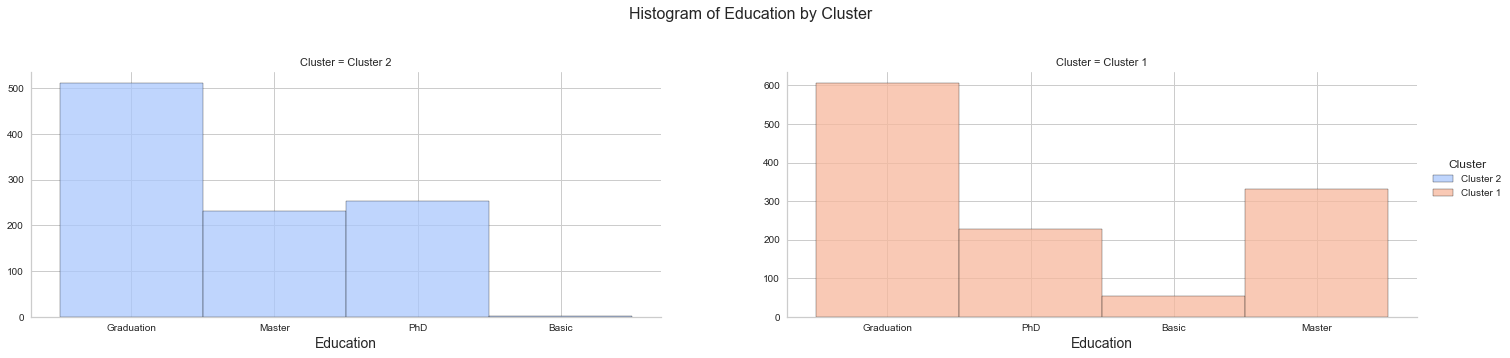

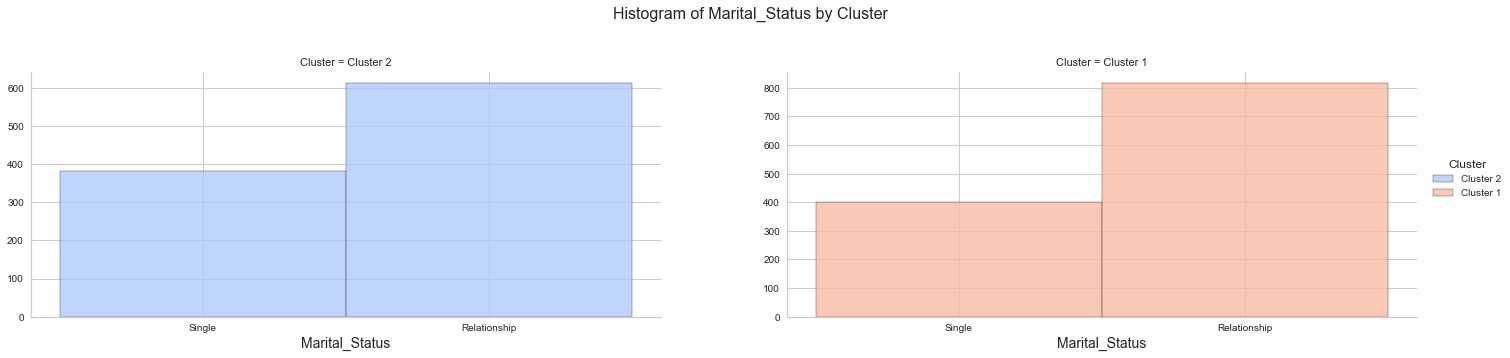

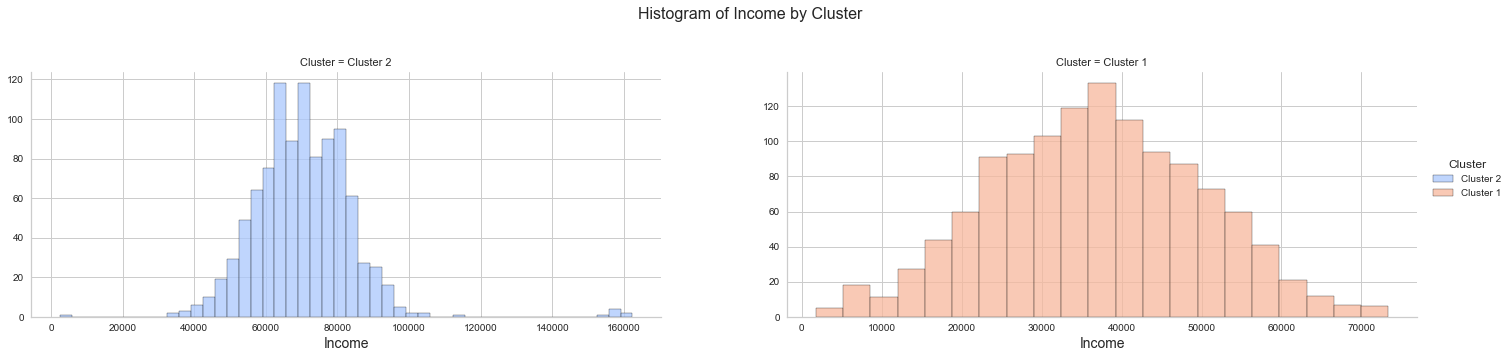

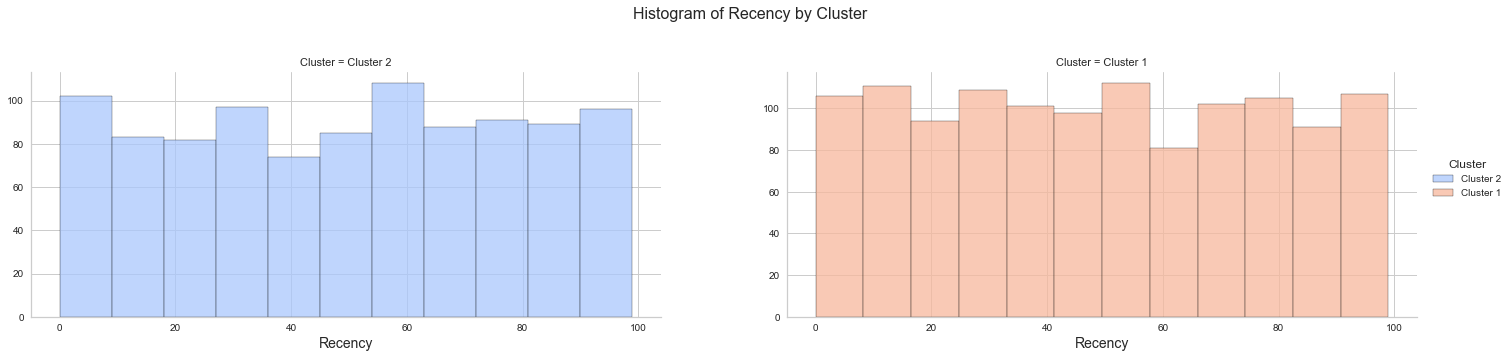

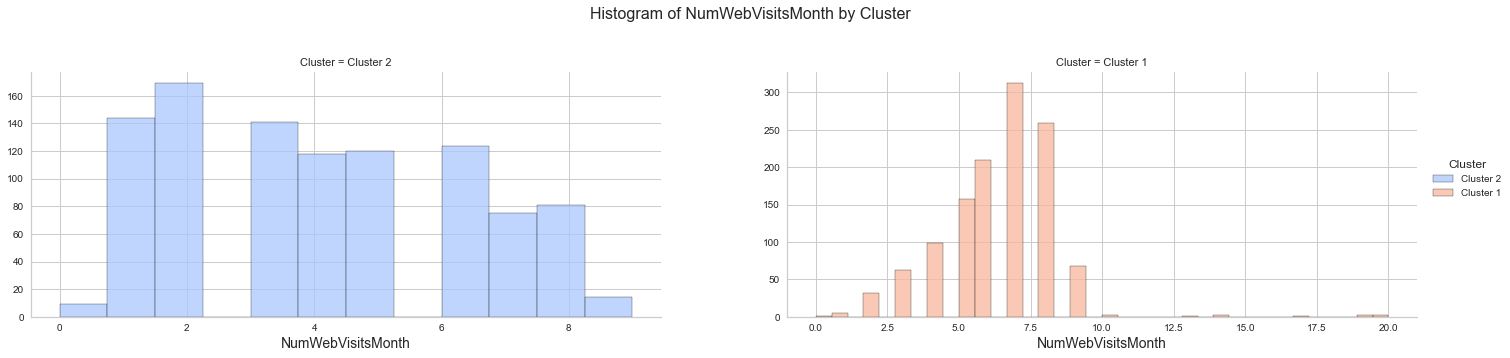

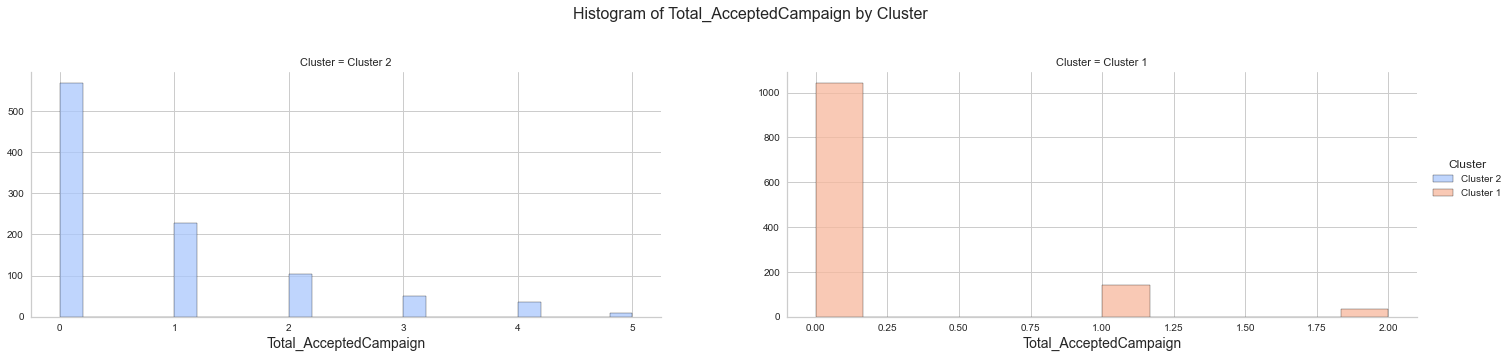

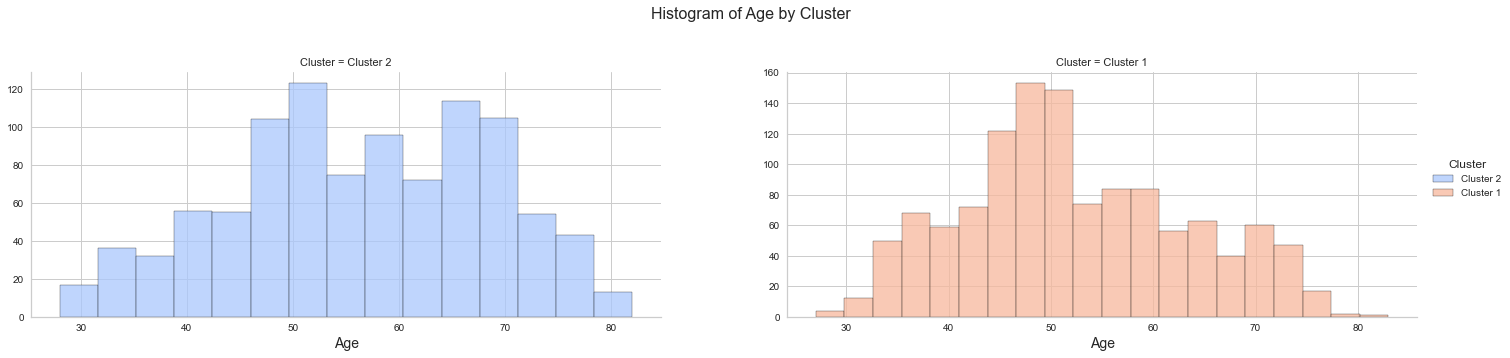

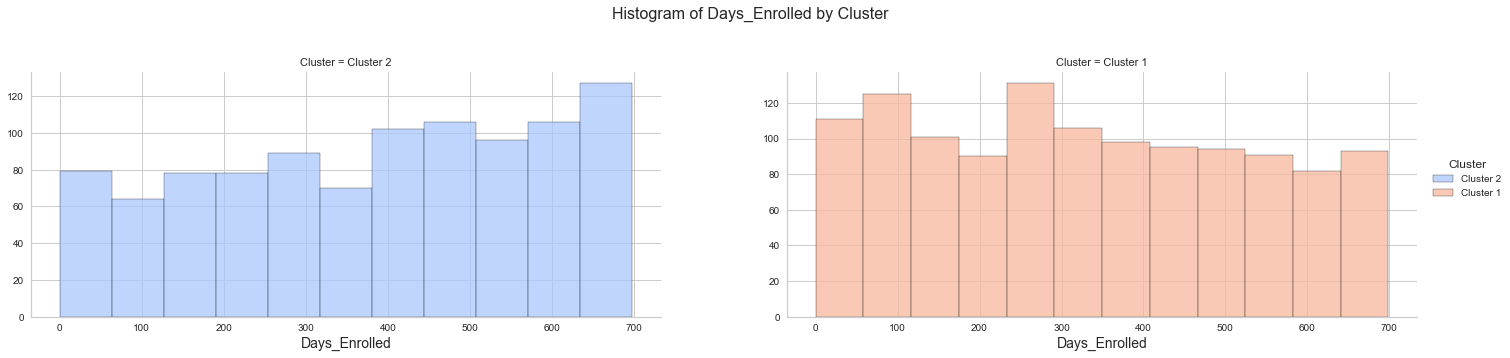

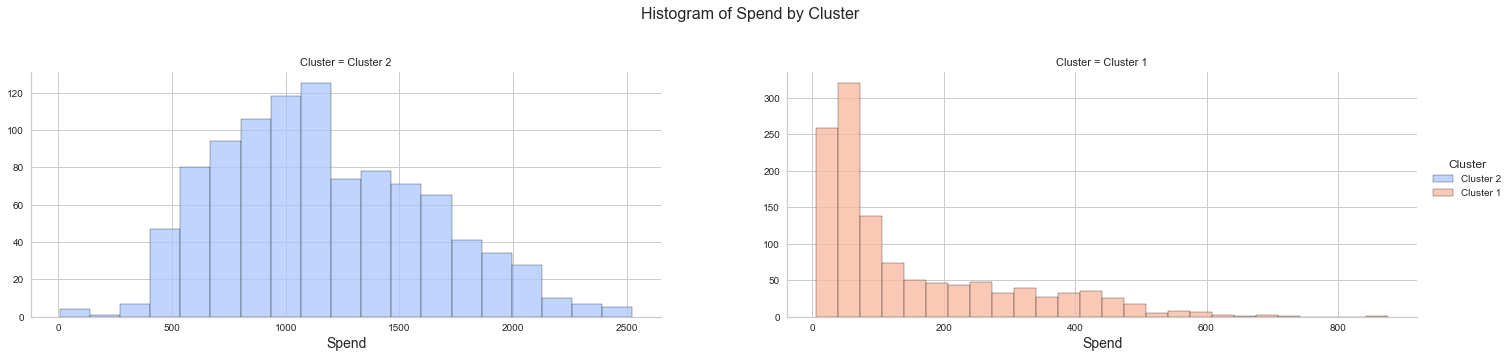

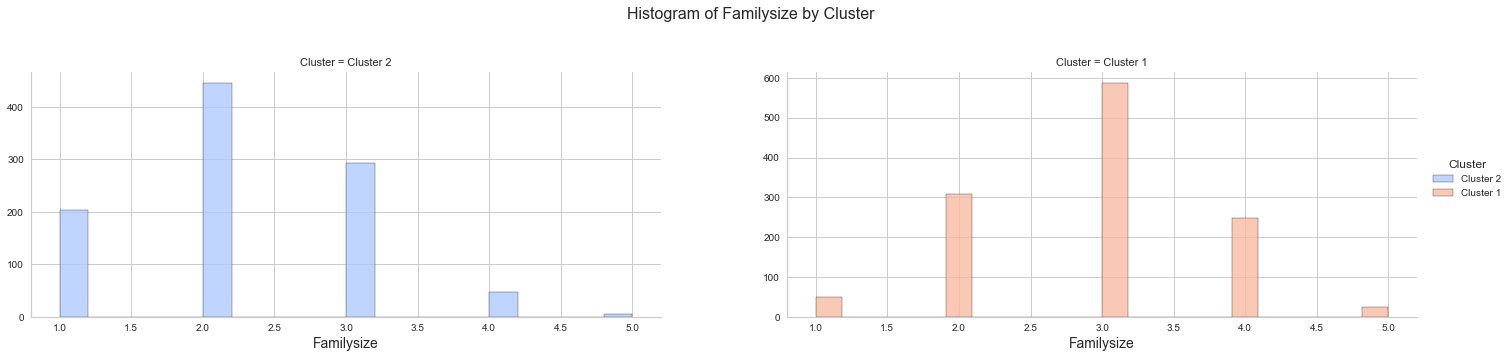

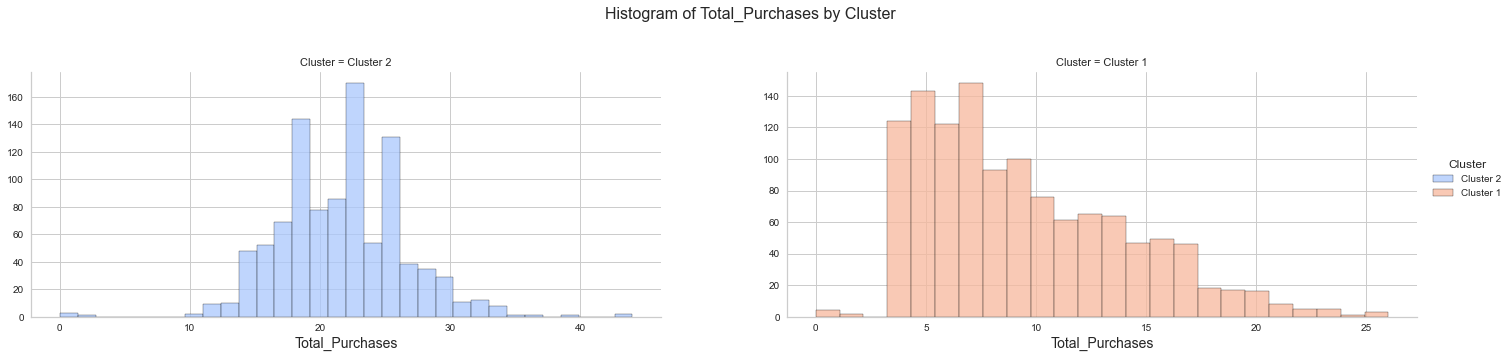

In [62]:
for i in df_clean:
    g = sns.FacetGrid(df_cluster, col="Cluster", hue="Cluster", palette="coolwarm", sharey=False, sharex=False, height=5, aspect=2)
    g.map(sns.histplot, i)
    
    # Add title to each histogram
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f"Histogram of {i} by Cluster", fontsize=16)
    
    # Increase font size of title and labels
    g.set_titles(fontsize=14)
    g.set_xlabels(fontsize=14)
    g.set_ylabels(fontsize=14)
    
    # Add legend
    g.add_legend()
    
    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    
    # Show the plot
    plt.show()

### Insight:
There is a clear difference in income levels between the two groups, with Cluster 1 having a notably higher income than Cluster 2. Additionally, Cluster 1 tends to have fewer children at home compared to Cluster 2, with the majority of customers having no children and only a small percentage having one child. In contrast, most customers in Cluster 2 have one child, and some have two.

In terms of purchasing behavior, customers in Cluster 1 tend to buy significantly more products than those in Cluster 2, across all product categories. This suggests that people in Cluster 1 have greater purchasing power and are more likely to buy goods from the company. The number of offers accepted during campaigns also supports this conclusion, with Cluster 1 customers accepting more offers overall.

Furthermore, people in Cluster 1 tend to purchase products from a wider variety of locations, with a preference for purchasing products in physical stores. This is not surprising given that most of our customers in these clusters are middle-aged or elderly.

Finally, it is worth noting that some customers in Cluster 2 have made unusually large purchases. One possible explanation for this is that they are buying products for special festivals or parties. Checking the purchasing dates of these products may provide further insight into this phenomenon.

In [63]:
df_cluster = pd.DataFrame(df_['Cluster'].value_counts()).reset_index()
df_cluster.columns = ['Cluster', 'Count']

fig = go.Figure(data=[go.Pie(labels=df_cluster['Cluster'], values=df_cluster['Count'], hole=.3)])
fig.update_layout(
    title="<b>Cluster</b>",
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    plot_bgcolor='rgb(229, 236, 246)',
    paper_bgcolor='rgb(229, 236, 246)',
)
fig.show()

## Insight:
- The number of customer of cluster 2 is lesser than customer with cluster 1

In [64]:
fig = px.strip(df_, x="Cluster", y="Spend", color="Cluster",
               title="<b>Spending by Cluster</b>")
fig.update_layout(paper_bgcolor='rgb(229, 236, 246)')
fig.show()

## Insight:
- The spending of customer with cluster 2 is on range between 0 - 2500 while spending of customer with cluster 1 is on range brtween 0 - 900

In [65]:
fig = px.histogram(df_, x="Total_AcceptedCampaign", color="Cluster",
                   color_discrete_sequence=["#d21262", "#26bde2"],
                   nbins=10,
                   template="simple_white")

fig.update_layout(
    title="<b>Number of Campaigns Accepted</b>",
    xaxis_title="Number Of Accepted Campaigns",
    yaxis_title="Count",
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    plot_bgcolor='rgb(229, 236, 246)',
    paper_bgcolor='rgb(229, 236, 246)',
)

fig.show()

## Insight:
- The campaigns accepted in customer with cluster 1 is totally not accepted any campaign due to the larger amount of customer cluster 1 was accepted 0 campaigns.
- Cluster 2 is mostly accepted the campaigns and it shows that cluster 2 is more active

In [66]:
fig = px.box(df_, x="Cluster", y="Days_Enrolled", color="Cluster", color_discrete_sequence=["#d21262", "#26bde2"],
             title="<b>Number of Days Enrolled</b>")
fig.update_layout(
    paper_bgcolor='rgb(229, 236, 246)',
    plot_bgcolor='rgb(229, 236, 246)',
    xaxis_title="Cluster",
    yaxis_title="Number of Days Entrolled",
    font=dict(
        family="Arial",
        size=14,
        color="black"
    )
)
fig.show()


## Insight:
- The day time of cluster 2 is slightly higher than cluster 1 as its median is higher than cluster 1
- This show that cluster 2 was work longer period

In [84]:
# Define the columns of interest
Personal = ['Age', 'Income', 'Spend', 'Total_Purchases', 'Recency']

# Define the colors for each cluster
colors = px.colors.qualitative.Plotly

# Create the scatterplot matrix
fig = px.scatter_matrix(
    data_frame=df_,
    dimensions=Personal,
    color="Cluster",
    color_discrete_sequence=colors,
    opacity=0.7,
    title="Scatterplot Matrix for Customer Segmentation"
)

# Update the layout
fig.update_layout(
    height=800,
    title_font_size=24,
    font_size=12,
    hovermode="closest",
)

# Show the plot
fig.show()

## Insight:
- The recency result can ignore since it no any different in the result
- The interesting features in those plot was `Spend` and `Income` since they were positively distributed
- As the result, Income and Spend of cluster 2 is higher than cluster 1 

In [68]:
#Visualize all the feature based on spending
df_["Marital_Status"] = df_["Marital_Status"].astype("category")
df_["Education"] = df_["Education"].astype("category")

Personal = ["Age", "Education", "Marital_Status", "NumWebVisitsMonth", "Familysize"]

for i in Personal:
    fig = px.scatter(data_frame=df_, x=i, y="Spend", color="Cluster", marginal_y="violin", marginal_x="box",
                     color_discrete_sequence=px.colors.qualitative.Plotly)
    fig.update_layout(title=i.capitalize() + " vs Spending",
                      xaxis_title=i.capitalize(),
                      yaxis_title="Total Expense",
                      paper_bgcolor='rgb(229, 236, 246)',
                      plot_bgcolor='rgb(229, 236, 246)',
                      width=800,
                      height=600,
                      template="simple_white")
    fig.show()


# Cluster Analysis

**Cluster 1: Least Active Customers**

- These customers are from UG background.
- They have very low income or almost negligible income.
- They are younger, with an age range between 15 to 30.
- They have very few or no children.
- They spend very little money on the company.
- They are not very engaged with the company for a longer period of time.
- They are not very active in accept any campaign

**Cluster 2: Highly Active and Moderately Active Customers**

- These customers are from PG background.
- They have higher income than the Least Active Customers.
- They have more or less the same age range between 25 to 75, with maximum customer age between 35 to 60.
- They have varying number of children, with Highly Active Customers having more children on average than Moderately Active Customers.
- They spend different amounts of money, with Highly Active Customers spending less than Moderately Active Customers.
- They are both engaged with the company for a longer period of time compared to Least Active Customers.
- They basically accept at least 1 campaigns

# GUI (On going not done)

In [83]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import numpy as np


class App:
    def __init__(self, master):
        self.master = master
        master.title("Customer Segmentation")

        # Create a list of features that the user can select
        self.features = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Spending', 'Age', 'Day_Enrolled']

        # Create checkboxes for each feature
        self.checkboxes = {}
        for i, feature in enumerate(self.features):
            var = tk.BooleanVar()
            cb = tk.Checkbutton(master, text=feature, variable=var)
            cb.grid(row=i, column=0, sticky='w')
            self.checkboxes[feature] = var

        # Create buttons for each segmentation method
        self.kmeans_button = tk.Button(master, text="K-means", command=self.kmeans_segmentation)
        self.kmeans_button.grid(row=len(self.features), column=0, sticky='w')
        self.gmm_button = tk.Button(master, text="GMM", command=self.gmm_segmentation)
        self.gmm_button.grid(row=len(self.features), column=1, sticky='w')
        self.dbscan_button = tk.Button(master, text="DBSCAN", command=self.dbscan_segmentation)
        self.dbscan_button.grid(row=len(self.features), column=2, sticky='w')
#         self.rfm_button = tk.Button(master, text="RFM", command=self.rfm_segmentation)
#         self.rfm_button.grid(row=len(self.features), column=3, sticky='w')

        # Create a button to load data
        self.load_button = tk.Button(master, text="Load Data", command=self.load_data)
        self.load_button.grid(row=len(self.features) + 1, column=0, sticky='w')

        # Create a label for displaying the results
        self.result_label = tk.Label(master, text="")
        self.result_label.grid(row=len(self.features) + 2, column=0, columnspan=4)

        # Create a button to export the results
        self.export_button = tk.Button(master, text="Export Results", command=self.export_results)
        self.export_button.grid(row=len(self.features) + 3, column=0, sticky='w')

    def load_data(self):
        # Load data from a file selected by the user
        filename = filedialog.askopenfilename()
        self.data = pd.read_csv(filename)

    def kmeans_segmentation(self):
        # Apply K-means clustering to the selected features
        features = [feature for feature, var in self.checkboxes.items() if var.get()]
        X = self.data[features]
        kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        self.result_label.config(text=f"K-means clustering: Silhouette score = {score:.3f}")

    def gmm_segmentation(self):
        # Apply Gaussian Mixture Model clustering to the selected features
        features = [feature for feature, var in self.checkboxes.items() if var.get()]
        X = self.data[features]
        gmm = GaussianMixture(n_components=3, random_state=0).fit(X)
        labels = gmm.predict(X)
        score = silhouette_score
        
    def dbscan_segmentation(self):
        # Apply DBSCAN clustering to the selected features
        features = [feature for feature, var in self.checkboxes.items() if var.get()]
        X = self.data[features]
        dbscan = DBSCAN(eps=3, min_samples=2).fit(X)
        labels = dbscan.labels_
        score = silhouette_score(X, labels)
        self.result_label.config(text=f"DBSCAN clustering: Silhouette score = {score:.3f}")
        
    def export_results(self):
        # Get the filename from the user
        filename = filedialog.asksaveasfilename(defaultextension='.csv')

        # If the user cancels, return
        if not filename:
            return

        # Write the results to the file
        with open(filename, 'w') as f:
            writer = csv.writer(f)
            writer.writerow(['Image File', 'Algorithm', 'Parameters', 'Elapsed Time', 'Result'])
            for result in self.results:
                writer.writerow([result[0], result[1], result[2], result[3], result[4]])



root = tk.Tk()
app = App(root)
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Twx0717\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-83-7d8e90c90567>", line 56, in kmeans_segmentation
    X = self.data[features]
  File "C:\Users\Twx0717\anaconda3\lib\site-packages\pandas\core\frame.py", line 3030, in __getitem__
    indexer = self.loc._get_listlike_indexer(key, axis=1, raise_missing=True)[1]
  File "C:\Users\Twx0717\anaconda3\lib\site-packages\pandas\core\indexing.py", line 1266, in _get_listlike_indexer
    self._validate_read_indexer(keyarr, indexer, axis, raise_missing=raise_missing)
  File "C:\Users\Twx0717\anaconda3\lib\site-packages\pandas\core\indexing.py", line 1308, in _validate_read_indexer
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index(['Age', 'Day_Enrolled'], dtype='object')] are in the [columns]"
Exception in Tkinter callback
Traceback (most recent call last):
  Fi